In [125]:
# imports all of the libraries we will be needing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [126]:
# obtains the data from the csv file
data = pd.read_csv('survey_data.csv')

In [198]:
# looks at the first 5 entries of the data
data.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,1,20,15,1,1,0,0,...,1,1,1,0,13,0,1,1,0,0
1,0648-AIPJSP-UVM,5,5,0,22,17,2,0,0,0,...,0,1,0,1,18,1,1,1,1,1
2,5195-TLUDJE-HVO,3,4,1,67,14,2,0,16,0,...,0,0,0,0,21,0,0,0,0,1
3,4459-VLPQUH-3OL,4,3,0,23,16,2,0,0,0,...,0,0,0,1,26,1,1,1,0,1
4,8158-SMTQFB-CNO,2,2,0,26,16,2,0,1,0,...,1,1,1,0,27,1,0,1,0,0


In [199]:
data.info()
# there are 5000 entries, no null values, 60 columns, and the following data types float64(11), int64(46), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   object 
 1   Region               5000 non-null   int64  
 2   TownSize             5000 non-null   object 
 3   Gender               5000 non-null   int64  
 4   Age                  5000 non-null   int64  
 5   EducationYears       5000 non-null   int64  
 6   JobCategory          5000 non-null   int64  
 7   UnionMember          5000 non-null   int64  
 8   EmploymentLength     5000 non-null   int64  
 9   Retired              5000 non-null   int64  
 10  HouseholdIncome      5000 non-null   int64  
 11  DebtToIncomeRatio    5000 non-null   float64
 12  CreditDebt           5000 non-null   float64
 13  OtherDebt            5000 non-null   float64
 14  LoanDefault          5000 non-null   int64  
 15  MaritalStatus        5000 non-null   i

In [200]:
# creates a dataframe for the data we are selecting
# Quasi-identifiers: 'Gender', 'Age', 'EducationYears', 'HouseholdIncome', 'DebtToIncomeRatio', 'EmploymentLength'
df = pd.DataFrame(data[['CustomerID','Gender', 'Age', 'EducationYears', 'HouseholdIncome', 'DebtToIncomeRatio', 'EmploymentLength']])
df

,CustomerID,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
0,3964-QJWTRG-NPN,1,20,15,31,11.1,0
1,0648-AIPJSP-UVM,0,22,17,15,18.6,0
2,5195-TLUDJE-HVO,1,67,14,35,9.9,16
3,4459-VLPQUH-3OL,0,23,16,20,5.7,0
4,8158-SMTQFB-CNO,0,26,16,23,1.7,1
...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,0,68,10,196,8.0,24
4996,4699-LEPCCE-3UD,0,51,14,83,15.0,6
4997,8485-LLUICH-CVV,0,75,17,108,10.8,24
4998,9325-URAAUT-7FA,0,47,19,189,10.8,3


In [201]:
# describes our data
# we have 5000 unique customers
# the min value of Age is 18, the average age is 47, while the max value is 79
# the min value of Education years is 6, the average is 14, while the max value is 23
# the min value of Household income is 9, the average is 54, while the max value is 1073
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43
# the min value of Employment length is 0, the average age is 10, while the max value is 52
df.describe()

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.503600,47.025600,14.543000,54.759600,9.954160,9.730400
std,0.500037,17.770338,3.281083,55.377511,6.399783,9.690929
min,0.000000,18.000000,6.000000,9.000000,0.000000,0.000000
25%,0.000000,31.000000,12.000000,24.000000,5.100000,2.000000
50%,1.000000,47.000000,14.000000,38.000000,8.800000,7.000000
75%,1.000000,62.000000,17.000000,67.000000,13.600000,15.000000
max,1.000000,79.000000,23.000000,1073.000000,43.100000,52.000000


In [202]:
# Eliminating some outliers

# the min value of Household income is 9, the average is 54, while the max value is 1073. 
# I decided to eliminate values above 100 as they would be easily identified compared to the average of 47
df = df[df['HouseholdIncome'] <= 101]

# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43
# I decided to eliminate values below 0.1 as they would be easily identified compared to the average of 10 and greater than 34 as they would be easily identifiable
# there was one peson with debt to income ratio of 0
df = df.loc[(df['DebtToIncomeRatio'] > 0.01) & (df['DebtToIncomeRatio'] < 35)]
# the min value of Employment length is 0, the average age is 10, while the max value is 52
# i decided to eliminate the values above 42 as they are very few and easily identifiable
df = df.loc[(df['EmploymentLength'] < 43)]

clean_data = df


## Mask the data

In [203]:
# mask the data
# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 3
bins = range(1, 82, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID           0
Gender               0
Age                  0
EducationYears       0
HouseholdIncome      0
DebtToIncomeRatio    0
EmploymentLength     0
Age_group            0
dtype: int64

In [204]:
# lets take a look at our df after age has been dropped and age group has been created
df = df.drop('Age', axis=1)
df

,CustomerID,Gender,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group
0,3964-QJWTRG-NPN,1,15,31,11.1,0,19-21
1,0648-AIPJSP-UVM,0,17,15,18.6,0,19-21
2,5195-TLUDJE-HVO,1,14,35,9.9,16,64-66
3,4459-VLPQUH-3OL,0,16,20,5.7,0,22-24
4,8158-SMTQFB-CNO,0,16,23,1.7,1,25-27
...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,15,49,0.5,10,52-54
4993,8563-YGTRBK-25I,0,18,60,2.1,2,55-57
4994,1973-VJDGJA-TQ6,1,15,53,11.3,1,34-36
4996,4699-LEPCCE-3UD,0,14,83,15.0,6,49-51


In [205]:
# mask the data
# step 2: Education Years masking 
# group the education years into bins of range 3
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(1, 26, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['EducationYears_group'] = pd.cut(df['EducationYears'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID              0
Gender                  0
EducationYears          0
HouseholdIncome         0
DebtToIncomeRatio       0
EmploymentLength        0
Age_group               0
EducationYears_group    0
dtype: int64

In [206]:
# lets take a look at our df after education years has been dropped and education years group has been created
df = df.drop('EducationYears', axis=1)
df


,CustomerID,Gender,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,EducationYears_group
0,3964-QJWTRG-NPN,1,31,11.1,0,19-21,13-15
1,0648-AIPJSP-UVM,0,15,18.6,0,19-21,16-18
2,5195-TLUDJE-HVO,1,35,9.9,16,64-66,13-15
3,4459-VLPQUH-3OL,0,20,5.7,0,22-24,13-15
4,8158-SMTQFB-CNO,0,23,1.7,1,25-27,13-15
...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,49,0.5,10,52-54,13-15
4993,8563-YGTRBK-25I,0,60,2.1,2,55-57,16-18
4994,1973-VJDGJA-TQ6,1,53,11.3,1,34-36,13-15
4996,4699-LEPCCE-3UD,0,83,15.0,6,49-51,13-15


In [207]:
# mask the data
# step 3: Household income masking 
# group the household income into bins of range 3
# the min value of Household income is 9, the average is 54, while the max value is 1073
bins = range(1, 106, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['HouseholdIncome_group'] = pd.cut(df['HouseholdIncome'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID               0
Gender                   0
HouseholdIncome          0
DebtToIncomeRatio        0
EmploymentLength         0
Age_group                0
EducationYears_group     0
HouseholdIncome_group    0
dtype: int64

In [208]:
# lets take a look at our df after education years has been dropped and education years group has been created
df = df.drop('HouseholdIncome', axis=1)
df

,CustomerID,Gender,DebtToIncomeRatio,EmploymentLength,Age_group,EducationYears_group,HouseholdIncome_group
0,3964-QJWTRG-NPN,1,11.1,0,19-21,13-15,28-30
1,0648-AIPJSP-UVM,0,18.6,0,19-21,16-18,13-15
2,5195-TLUDJE-HVO,1,9.9,16,64-66,13-15,34-36
3,4459-VLPQUH-3OL,0,5.7,0,22-24,13-15,19-21
4,8158-SMTQFB-CNO,0,1.7,1,25-27,13-15,22-24
...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,0.5,10,52-54,13-15,46-48
4993,8563-YGTRBK-25I,0,2.1,2,55-57,16-18,58-60
4994,1973-VJDGJA-TQ6,1,11.3,1,34-36,13-15,52-54
4996,4699-LEPCCE-3UD,0,15.0,6,49-51,13-15,82-84


In [209]:
# mask the data
# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 3
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(-1, 46, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['DebtToIncomeRatio_group'] = pd.cut(df['DebtToIncomeRatio'], bins=bins, labels=labels)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID                 0
Gender                     0
DebtToIncomeRatio          0
EmploymentLength           0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
dtype: int64

In [210]:
# There was a value that was ungrouped above. '0.0'
# The range was chanted to start a -1 to include 0.0
# ungrouped = df['DebtToIncomeRatio_group'].isna()
# df[ungrouped]
#df[df['DebtToIncomeRatio'] == 0.0]


In [211]:
# mask the data
# step 5: Employment length masking 
# group the Employment Length into bins of range 3
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(-1, 56, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['EmploymentLength_group'] = pd.cut(df['EmploymentLength'], bins=bins, labels=labels)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID                 0
Gender                     0
DebtToIncomeRatio          0
EmploymentLength           0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
EmploymentLength_group     0
dtype: int64

In [212]:
# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df = df.drop(['EmploymentLength','DebtToIncomeRatio'], axis=1)
df

,CustomerID,Gender,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group
0,3964-QJWTRG-NPN,1,19-21,13-15,28-30,11-13,-1-1
1,0648-AIPJSP-UVM,0,19-21,16-18,13-15,17-19,-1-1
2,5195-TLUDJE-HVO,1,64-66,13-15,34-36,8-10,14-16
3,4459-VLPQUH-3OL,0,22-24,13-15,19-21,5-7,-1-1
4,8158-SMTQFB-CNO,0,25-27,13-15,22-24,-1-1,-1-1
...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,52-54,13-15,46-48,-1-1,8-10
4993,8563-YGTRBK-25I,0,55-57,16-18,58-60,2-4,-1-1
4994,1973-VJDGJA-TQ6,1,34-36,13-15,52-54,11-13,-1-1
4996,4699-LEPCCE-3UD,0,49-51,13-15,82-84,14-16,5-7


In [213]:
# mask the data
# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df['Sex'] = df['Gender'].map(gender_map)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

CustomerID                 0
Gender                     0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
EmploymentLength_group     0
Sex                        0
dtype: int64

In [214]:
# lets take a look at our df after dropping 'Gender','CustomerID' and creating the Sex column
df = df.drop(['Gender','CustomerID'], axis=1)

# below is our new data, with our 6 equivalence classes:Age_group	EducationYears_group	HouseholdIncome_group	DebtToIncomeRatio_group	EmploymentLength_group	Sex
# our data has been masked, grouped by intervals of 3
df

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
0,19-21,13-15,28-30,11-13,-1-1,M
1,19-21,16-18,13-15,17-19,-1-1,F
2,64-66,13-15,34-36,8-10,14-16,M
3,22-24,13-15,19-21,5-7,-1-1,F
4,25-27,13-15,22-24,-1-1,-1-1,F
...,...,...,...,...,...,...
4992,52-54,13-15,46-48,-1-1,8-10,M
4993,55-57,16-18,58-60,2-4,-1-1,F
4994,34-36,13-15,52-54,11-13,-1-1,M
4996,49-51,13-15,82-84,14-16,5-7,F


In [215]:
# lets find out more information of our new data
df.describe()

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
count,4399,4399,4399,4399,4399,4399
unique,21,7,32,12,15,2
top,34-36,13-15,22-24,5-7,-1-1,M
freq,280,1415,305,944,1339,2223


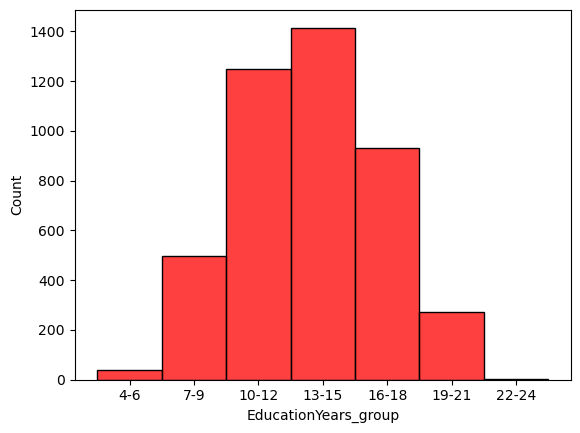

In [216]:
# histogram for our 'EducationYears_group' equivalence class

sns.histplot(data=df, x='EducationYears_group', color='red', bins=20)
plt.show()

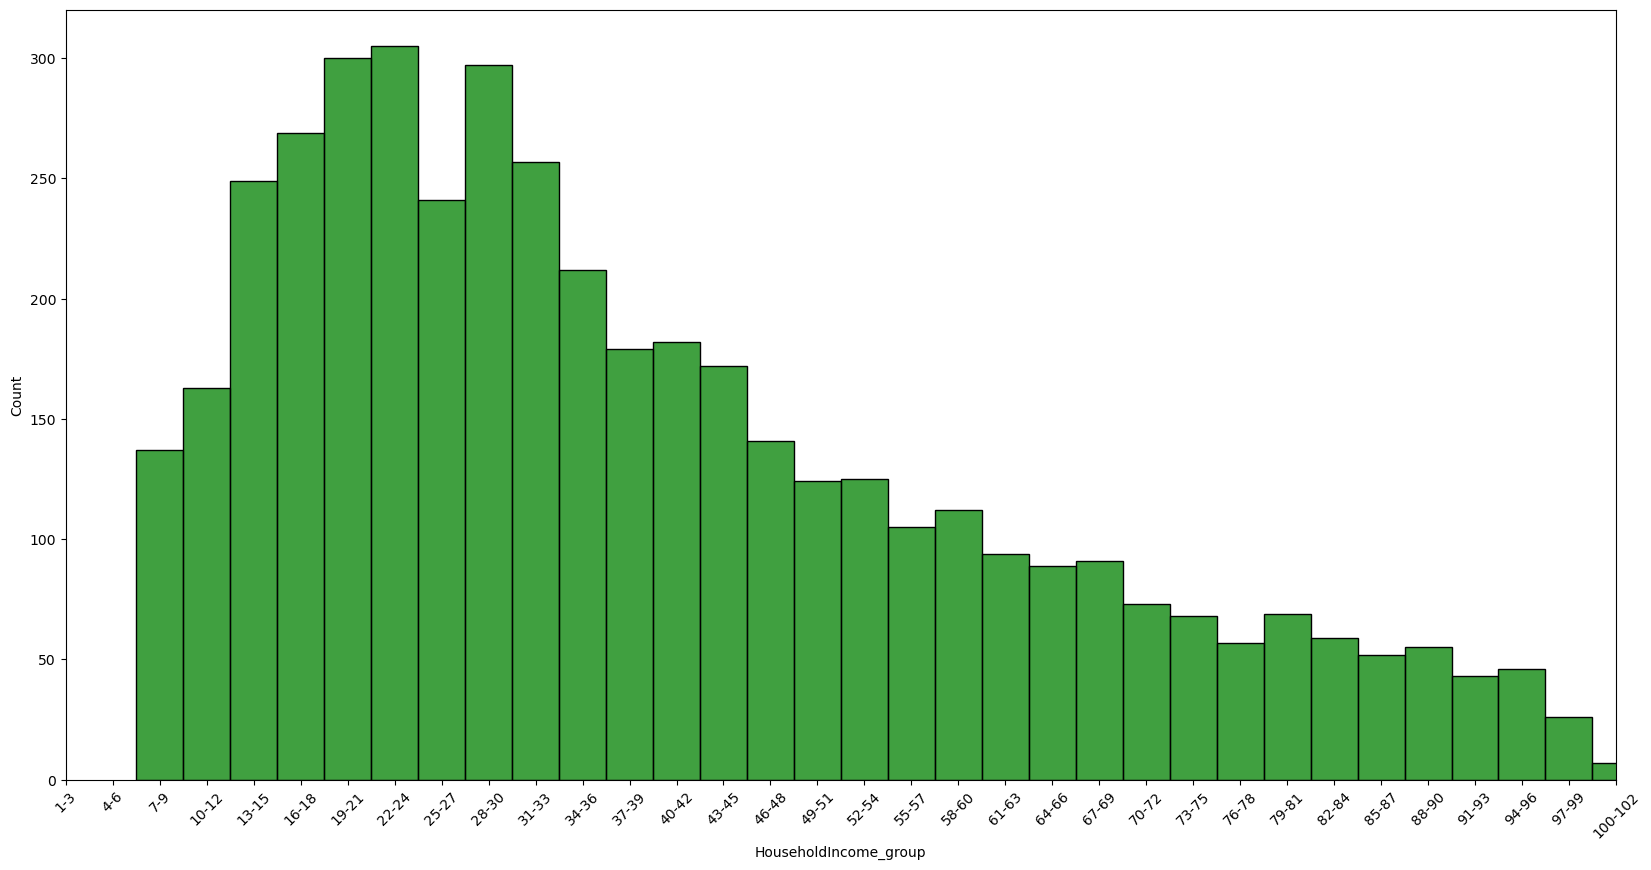

In [217]:
# histogram for our 'HouseholdIncome_group' equivalence class

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='HouseholdIncome_group', color='green', bins=10)
plt.xlim(0, 33)
plt.xticks(rotation=45)
plt.show()

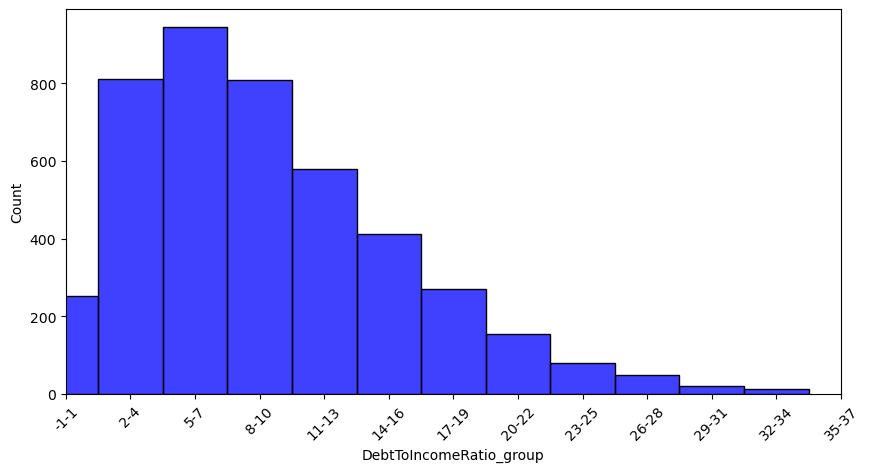

In [218]:
# histogram for our 'DebtToIncomeRatio_group' equivalence class

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='DebtToIncomeRatio_group', color='blue', bins=1)
plt.xlim(0, 12)
plt.xticks(rotation=45)
plt.show()

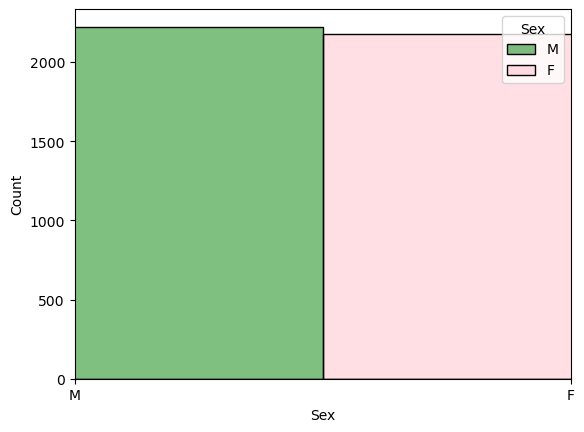

In [219]:
# histogram for our 'Sex' equivalence class
# we can see that our sex category is almost evenly distributed between males and females

sns.histplot(data=df, x='Sex', hue='Sex', bins=1, palette={'M':'green', 'F':'pink'})
plt.xlim(0, 1)
plt.show()

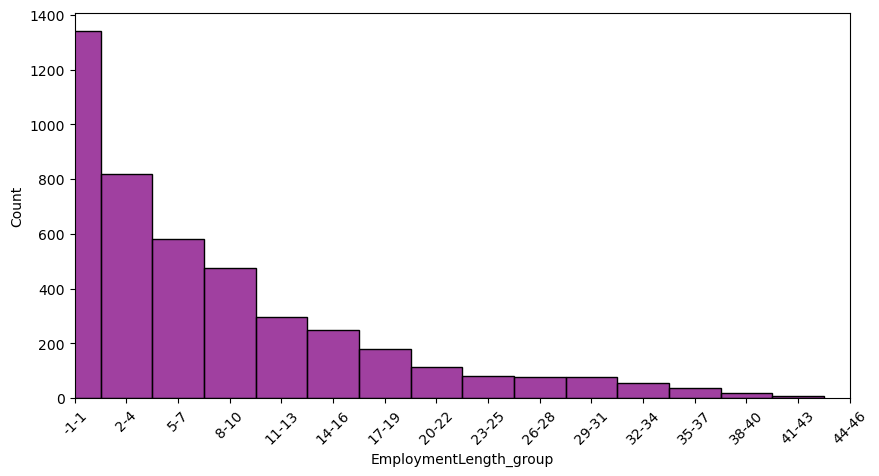

In [220]:
# histogram for our 'EmploymentLength_group' equivalence class
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='EmploymentLength_group', color='purple', bins=10)
plt.xlim(0, 15)
plt.xticks(rotation=45)
plt.show()

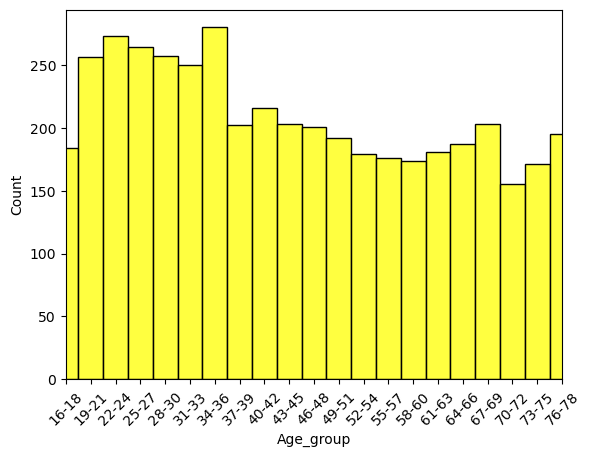

In [221]:
# histogram for our 'Age group' equivalence class
sns.histplot(data=df, x='Age_group', color='yellow', bins=1)
plt.xlim(5, 25)
plt.xticks(rotation=45)
plt.show()

In [222]:
df.describe()

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
count,4399,4399,4399,4399,4399,4399
unique,21,7,32,12,15,2
top,34-36,13-15,22-24,5-7,-1-1,M
freq,280,1415,305,944,1339,2223


In [223]:
df

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
0,19-21,13-15,28-30,11-13,-1-1,M
1,19-21,16-18,13-15,17-19,-1-1,F
2,64-66,13-15,34-36,8-10,14-16,M
3,22-24,13-15,19-21,5-7,-1-1,F
4,25-27,13-15,22-24,-1-1,-1-1,F
...,...,...,...,...,...,...
4992,52-54,13-15,46-48,-1-1,8-10,M
4993,55-57,16-18,58-60,2-4,-1-1,F
4994,34-36,13-15,52-54,11-13,-1-1,M
4996,49-51,13-15,82-84,14-16,5-7,F


In [224]:
# summarize the counts for each column

age_counts = df['Age_group'].value_counts()
edu_counts = df['EducationYears_group'].value_counts()
income_counts = df['HouseholdIncome_group'].value_counts()
dti_counts = df['DebtToIncomeRatio_group'].value_counts()
emp_counts = df['EmploymentLength_group'].value_counts()
sex_counts = df['Sex'].value_counts()

age_counts

34-36    280
22-24    273
25-27    264
28-30    257
19-21    256
31-33    250
40-42    216
67-69    203
43-45    203
37-39    202
46-48    201
76-78    195
49-51    192
64-66    187
16-18    184
61-63    181
52-54    179
55-57    176
58-60    174
73-75    171
70-72    155
4-6        0
13-15      0
10-12      0
7-9        0
1-3        0
Name: Age_group, dtype: int64

In [225]:
# Convert value counts to dataframes
age_df = pd.DataFrame(age_counts)
edu_df = pd.DataFrame(edu_counts)
income_df = pd.DataFrame(income_counts)
dti_df = pd.DataFrame(dti_counts)
emp_df = pd.DataFrame(emp_counts)
sex_df = pd.DataFrame(sex_counts)

# Create dataframes from value counts dictionaries
age_df = pd.DataFrame({'Age_group': age_counts.index, 'Count': age_counts.values})
edu_df = pd.DataFrame({'EducationYears_group': edu_counts.index, 'Count': edu_counts.values})
income_df = pd.DataFrame({'HouseholdIncome_group': income_counts.index, 'Count': income_counts.values})
dti_df = pd.DataFrame({'DebtToIncomeRatio_group': dti_counts.index, 'Count': dti_counts.values})
emp_df = pd.DataFrame({'EmploymentLength_group': emp_counts.index, 'Count': emp_counts.values})
sex_df = pd.DataFrame({'Sex': sex_counts.index, 'Count': sex_counts.values})

# example of a df
age_df

,Age_group,Count
0,34-36,280
1,22-24,273
2,25-27,264
3,28-30,257
4,19-21,256
5,31-33,250
6,40-42,216
7,67-69,203
8,43-45,203
9,37-39,202


In [226]:
# Concatenate the dataframes along the columns axis

results = pd.concat([age_df, edu_df, income_df, dti_df, emp_df, sex_df], axis=1)

results

,Age_group,Count,EducationYears_group,Count,HouseholdIncome_group,Count,DebtToIncomeRatio_group,Count,EmploymentLength_group,Count,Sex,Count
0,34-36,280.0,13-15,1415.0,22-24,305,5-7,944.0,-1-1,1339.0,M,2223.0
1,22-24,273.0,10-12,1247.0,19-21,300,2-4,811.0,2-4,817.0,F,2176.0
2,25-27,264.0,16-18,929.0,28-30,297,8-10,810.0,5-7,581.0,NaN,NaN
3,28-30,257.0,7-9,498.0,16-18,269,11-13,580.0,8-10,475.0,NaN,NaN
4,19-21,256.0,19-21,270.0,31-33,257,14-16,411.0,11-13,296.0,NaN,NaN
5,31-33,250.0,4-6,37.0,13-15,249,17-19,271.0,14-16,247.0,NaN,NaN
6,40-42,216.0,22-24,3.0,25-27,241,-1-1,253.0,17-19,178.0,NaN,NaN
7,67-69,203.0,1-3,0.0,34-36,212,20-22,154.0,20-22,113.0,NaN,NaN
8,43-45,203.0,NaN,NaN,40-42,182,23-25,81.0,23-25,82.0,NaN,NaN
9,37-39,202.0,NaN,NaN,37-39,179,26-28,50.0,29-31,78.0,NaN,NaN


## Risk Information


In [227]:
# smallest equivalence class = 3
# formula 1/ total of equivalence class 
risk_id = 1/3
risk_id
# risk identification is 33% 

0.3333333333333333

In [228]:
# 4 risk scenarios: Scenario 1: Deliberate Data Attack

numberof_employees = 300.0
rogue_employees = 60.0
#formula = rogue_employees/numberofemployees
risk_identification = (rogue_employees/numberof_employees) * 100
risk_identification
# risk identification is 20% 
 

20.0

In [229]:
# 4 risk scenarios: Scenario 2: Inadvertent Data Attack
# resource https://www.fundera.com/resources/small-business-lending-statistics#:~:text=Alternative%20lenders%20have%20a%2056.8,have%20a%2027.7%25%20approval%20rate.

bank_approval_rate = 27.70/100
average_friends = 150.00
# formula = 1-(1-0.02770)^150
#probabilityof_acquaintance = 1.00 - (1.00 - bank_approval_rate)^average_friends
# probabilityof_acquaintance is 99%

In [230]:
# 4 risk scenarios: Scenario 3: Data Breach

# average percent of people who get their credentials stolen = 19% 
# probability of breach is 19% 
# resource https://www.ibm.com/reports/data-breach?utm_content=SRCWW&p1=Search&p4=43700072379268724&p5=p&gclid=CjwKCAiAjPyfBhBMEiwAB2CCIsX8n31iNCT5XQbRg6IFte3ohXSURwF86uA5mFSlkIGRweg5WIisrRoCdSYQAvD_BwE&gclsrc=aw.ds 
probability_of_breach = 19.0

In [231]:
# 4 risk scenarios: Scenario 4: Demonstration attack
risk = 100.0
# 100% risk of getting identified

In [232]:
# display the entire dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
0,19-21,13-15,28-30,11-13,-1-1,M
1,19-21,16-18,13-15,17-19,-1-1,F
2,64-66,13-15,34-36,8-10,14-16,M
3,22-24,13-15,19-21,5-7,-1-1,F
4,25-27,13-15,22-24,-1-1,-1-1,F
6,49-51,13-15,76-78,-1-1,8-10,M
7,43-45,13-15,94-96,14-16,8-10,M
8,64-66,10-12,13-15,2-4,14-16,M
9,46-48,10-12,82-84,2-4,17-19,F
10,58-60,16-18,46-48,8-10,5-7,M


## Trial # 2

In [247]:
# new equivalence classes based on a copy of our df
df2 = pd.DataFrame(clean_data)
df2

,CustomerID,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2
0,3964-QJWTRG-NPN,1,20,15,31,11.1,0,19-21,19-24,13-18,25-30,11-16,-1-4,M
1,0648-AIPJSP-UVM,0,22,17,15,18.6,0,19-21,19-24,13-18,13-18,17-22,-1-4,F
2,5195-TLUDJE-HVO,1,67,14,35,9.9,16,64-66,61-66,13-18,31-36,5-10,11-16,M
3,4459-VLPQUH-3OL,0,23,16,20,5.7,0,22-24,19-24,13-18,19-24,5-10,-1-4,F
4,8158-SMTQFB-CNO,0,26,16,23,1.7,1,25-27,25-30,13-18,19-24,-1-4,-1-4,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,55,15,49,0.5,10,52-54,49-54,13-18,43-48,-1-4,5-10,M
4993,8563-YGTRBK-25I,0,56,18,60,2.1,2,55-57,55-60,13-18,55-60,-1-4,-1-4,F
4994,1973-VJDGJA-TQ6,1,35,15,53,11.3,1,34-36,31-36,13-18,49-54,11-16,-1-4,M
4996,4699-LEPCCE-3UD,0,51,14,83,15.0,6,49-51,49-54,13-18,79-84,11-16,5-10,F


In [248]:
# Data Masking

# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 6
bins = range(1, 82, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['Age_group2'] = pd.cut(df2['Age'], bins=bins, labels=labels)

# step 2: Education Years masking 
# group the education years into bins of range 6
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(1, 26, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['EducationYears_group2'] = pd.cut(df2['EducationYears'], bins=bins, labels=labels)


# step 3: Household income masking 
# group the household income into bins of range 6
# the min value of Household income is 9, the average is 54, while the max value is 1073
bins = range(1, 106, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['HouseholdIncome_group2'] = pd.cut(df2['HouseholdIncome'], bins=bins, labels=labels)

# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 6
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(-1, 46, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['DebtToIncomeRatio_group2'] = pd.cut(df2['DebtToIncomeRatio'], bins=bins, labels=labels)

# step 5: Employment length masking 
# group the Employment Length into bins of range 6
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(-1, 56, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['EmploymentLength_group2'] = pd.cut(df2['EmploymentLength'], bins=bins, labels=labels)


# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df2['Sex2'] = df2['Gender'].map(gender_map)

# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df2 = df2.drop(['Age','EducationYears', 'HouseholdIncome', 'CustomerID','EmploymentLength','DebtToIncomeRatio', 'Gender'], axis=1)

# make sure all of our values are grouped correctly
nan_count = df2.isna().sum()
nan_count

Age_group                   0
Age_group2                  0
EducationYears_group2       0
HouseholdIncome_group2      0
DebtToIncomeRatio_group2    0
EmploymentLength_group2     0
Sex2                        0
dtype: int64

In [249]:
df2.head()

,Age_group,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2
0,19-21,19-24,13-18,25-30,11-16,-1-4,M
1,19-21,19-24,13-18,13-18,17-22,-1-4,F
2,64-66,61-66,13-18,31-36,5-10,11-16,M
3,22-24,19-24,13-18,19-24,5-10,-1-4,F
4,25-27,25-30,13-18,19-24,-1-4,-1-4,F


In [250]:
# summarize the counts for each column

age_counts = df2['Age_group2'].value_counts()
edu_counts = df2['EducationYears_group2'].value_counts()
income_counts = df2['HouseholdIncome_group2'].value_counts()
dti_counts = df2['DebtToIncomeRatio_group2'].value_counts()
emp_counts = df2['EmploymentLength_group2'].value_counts()
sex_counts = df2['Sex2'].value_counts()

# Convert value counts to dataframes
age_df = pd.DataFrame(age_counts)
edu_df = pd.DataFrame(edu_counts)
income_df = pd.DataFrame(income_counts)
dti_df = pd.DataFrame(dti_counts)
emp_df = pd.DataFrame(emp_counts)
sex_df = pd.DataFrame(sex_counts)

# Create dataframes from value counts dictionaries
age_df = pd.DataFrame({'Age_group2': age_counts.index, 'Count': age_counts.values})
edu_df = pd.DataFrame({'EducationYears_group2': edu_counts.index, 'Count': edu_counts.values})
income_df = pd.DataFrame({'HouseholdIncome_group2': income_counts.index, 'Count': income_counts.values})
dti_df = pd.DataFrame({'DebtToIncomeRatio_group2': dti_counts.index, 'Count': dti_counts.values})
emp_df = pd.DataFrame({'EmploymentLength_group2': emp_counts.index, 'Count': emp_counts.values})
sex_df = pd.DataFrame({'Sex2': sex_counts.index, 'Count': sex_counts.values})

# Concatenate the dataframes along the columns axis

results2 = pd.concat([age_df, edu_df, income_df, dti_df, emp_df, sex_df], axis=1)

results2


,Age_group2,Count,EducationYears_group2,Count,HouseholdIncome_group2,Count,DebtToIncomeRatio_group2,Count,EmploymentLength_group2,Count,Sex2,Count
0,31-36,530.0,13-18,2344.0,19-24,605,5-10,1754.0,-1-4,2156.0,M,2223.0
1,19-24,529.0,7-12,1745.0,25-30,538,-1-4,1064.0,5-10,1056.0,F,2176.0
2,25-30,521.0,19-24,273.0,13-18,518,11-16,991.0,11-16,543.0,NaN,NaN
3,37-42,418.0,1-6,37.0,31-36,469,17-22,425.0,17-22,291.0,NaN,NaN
4,43-48,404.0,NaN,NaN,37-42,361,23-28,131.0,23-28,159.0,NaN,NaN
5,49-54,371.0,NaN,NaN,43-48,313,29-34,34.0,29-34,132.0,NaN,NaN
6,61-66,368.0,NaN,NaN,7-12,300,35-40,0.0,35-40,56.0,NaN,NaN
7,73-78,366.0,NaN,NaN,49-54,249,NaN,NaN,41-46,6.0,NaN,NaN
8,67-72,358.0,NaN,NaN,55-60,217,NaN,NaN,47-52,0.0,NaN,NaN
9,55-60,350.0,NaN,NaN,61-66,183,NaN,NaN,NaN,NaN,NaN,NaN


# Risk Information 2

In [253]:
# smallest equivalence class = 34
# formula 1/ total of equivalence class 
risk_id = 1/34
risk_id
# risk identification is 29% 

0.029411764705882353

# Trial #3

In [275]:
# new equivalence classes based on a copy of our df
df3 = pd.DataFrame(clean_data)
df3

,CustomerID,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2,Age_group3,EducationYears_group3,HouseholdIncome_group3,DebtToIncomeRatio_group3,EmploymentLength_group3,Sex3
0,3964-QJWTRG-NPN,1,20,15,31,11.1,0,19-21,16-30,1-15,16-30,-1-13,-1-13,M,10-19,10-19,21-30,9-18,-1-8,M
1,0648-AIPJSP-UVM,0,22,17,15,18.6,0,19-21,16-30,NaN,1-15,14-28,-1-13,F,20-29,10-19,11-20,9-18,-1-8,F
2,5195-TLUDJE-HVO,1,67,14,35,9.9,16,64-66,61-75,1-15,31-45,-1-13,14-28,M,60-69,10-19,31-40,9-18,9-18,M
3,4459-VLPQUH-3OL,0,23,16,20,5.7,0,22-24,16-30,1-15,16-30,-1-13,-1-13,F,20-29,10-19,11-20,-1-8,-1-8,F
4,8158-SMTQFB-CNO,0,26,16,23,1.7,1,25-27,16-30,1-15,16-30,-1-13,-1-13,F,20-29,10-19,21-30,-1-8,-1-8,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,6309-HRNBPZ-565,1,55,15,49,0.5,10,52-54,46-60,1-15,46-60,-1-13,-1-13,M,50-59,10-19,41-50,-1-8,9-18,M
4993,8563-YGTRBK-25I,0,56,18,60,2.1,2,55-57,46-60,NaN,46-60,-1-13,-1-13,F,50-59,10-19,51-60,-1-8,-1-8,F
4994,1973-VJDGJA-TQ6,1,35,15,53,11.3,1,34-36,31-45,1-15,46-60,-1-13,-1-13,M,30-39,10-19,51-60,9-18,-1-8,M
4996,4699-LEPCCE-3UD,0,51,14,83,15.0,6,49-51,46-60,1-15,76-90,14-28,-1-13,F,50-59,10-19,81-90,9-18,-1-8,F


In [276]:
# Data Masking

# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 9
bins = range(0, 90, 10)
labels = ['{}-{}'.format(i, i+9) for i in bins[:-1]]
df3['Age_group3'] = pd.cut(df3['Age'], bins=bins, labels=labels)

# step 2: Education Years masking 
# group the education years into bins of range 9
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(0, 40, 10)
labels = ['{}-{}'.format(i, i+9) for i in bins[:-1]]
df3['EducationYears_group3'] = pd.cut(df3['EducationYears'], bins=bins, labels=labels)


# step 3: Household income masking 
# group the household income into bins of range 9
# the min value of Household income is 9, the average is 54, while the max value is 1073
bins = range(1, 110, 10)
labels = ['{}-{}'.format(i, i+9) for i in bins[:-1]]
df3['HouseholdIncome_group3'] = pd.cut(df3['HouseholdIncome'], bins=bins, labels=labels)

# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 9
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(-1, 50, 10)
labels = ['{}-{}'.format(i, i+9) for i in bins[:-1]]
df3['DebtToIncomeRatio_group3'] = pd.cut(df3['DebtToIncomeRatio'], bins=bins, labels=labels)

# step 5: Employment length masking 
# group the Employment Length into bins of range 9
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(-1, 56, 10)
labels = ['{}-{}'.format(i, i+9) for i in bins[:-1]]
df3['EmploymentLength_group3'] = pd.cut(df3['EmploymentLength'], bins=bins, labels=labels)


# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df3['Sex3'] = df3['Gender'].map(gender_map)

# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df3 = df3.drop(['Age_group2', 'EducationYears_group2','HouseholdIncome_group2', 'DebtToIncomeRatio_group2', 'Age_group', 'EmploymentLength_group2', 'Sex2' ,'Age','EducationYears', 'HouseholdIncome', 'CustomerID','EmploymentLength','DebtToIncomeRatio', 'Gender'], axis=1)

# make sure all of our values are grouped correctly
nan_count = df3.isna().sum()
nan_count

Age_group3                  0
EducationYears_group3       0
HouseholdIncome_group3      0
DebtToIncomeRatio_group3    0
EmploymentLength_group3     0
Sex3                        0
dtype: int64

In [277]:
df3.head()

,Age_group3,EducationYears_group3,HouseholdIncome_group3,DebtToIncomeRatio_group3,EmploymentLength_group3,Sex3
0,10-19,10-19,21-30,9-18,-1-8,M
1,20-29,10-19,11-20,9-18,-1-8,F
2,60-69,10-19,31-40,9-18,9-18,M
3,20-29,10-19,11-20,-1-8,-1-8,F
4,20-29,10-19,21-30,-1-8,-1-8,F


In [278]:
# summarize the counts for each column

age_counts = df3['Age_group3'].value_counts()
edu_counts = df3['EducationYears_group3'].value_counts()
income_counts = df3['HouseholdIncome_group3'].value_counts()
dti_counts = df3['DebtToIncomeRatio_group3'].value_counts()
emp_counts = df3['EmploymentLength_group3'].value_counts()
sex_counts = df3['Sex3'].value_counts()

# Convert value counts to dataframes
age_df = pd.DataFrame(age_counts)
edu_df = pd.DataFrame(edu_counts)
income_df = pd.DataFrame(income_counts)
dti_df = pd.DataFrame(dti_counts)
emp_df = pd.DataFrame(emp_counts)
sex_df = pd.DataFrame(sex_counts)

# Create dataframes from value counts dictionaries
age_df = pd.DataFrame({'Age_group3': age_counts.index, 'Count': age_counts.values})
edu_df = pd.DataFrame({'EducationYears_group3': edu_counts.index, 'Count': edu_counts.values})
income_df = pd.DataFrame({'HouseholdIncome_group3': income_counts.index, 'Count': income_counts.values})
dti_df = pd.DataFrame({'DebtToIncomeRatio_group3': dti_counts.index, 'Count': dti_counts.values})
emp_df = pd.DataFrame({'EmploymentLength_group3': emp_counts.index, 'Count': emp_counts.values})
sex_df = pd.DataFrame({'Sex3': sex_counts.index, 'Count': sex_counts.values})

# Concatenate the dataframes along the columns axis

results3 = pd.concat([age_df, edu_df, income_df, dti_df, emp_df, sex_df], axis=1)

results3


,Age_group3,Count,EducationYears_group3,Count,HouseholdIncome_group3,Count,DebtToIncomeRatio_group3,Count,EmploymentLength_group3,Count,Sex3,Count
0,20-29,882.0,10-19,3754.0,21-30,953,-1-8,2277.0,-1-8,2900.0,M,2223.0
1,30-39,820.0,0-9,535.0,11-20,816,9-18,1741.0,9-18,973.0,F,2176.0
2,40-49,678.0,20-29,110.0,31-40,713,19-28,347.0,19-28,332.0,NaN,NaN
3,60-69,630.0,NaN,NaN,41-50,509,29-38,34.0,29-38,181.0,NaN,NaN
4,50-59,604.0,NaN,NaN,51-60,387,39-48,0.0,39-48,13.0,NaN,NaN
5,70-79,521.0,NaN,NaN,61-70,293,NaN,NaN,NaN,NaN,NaN,NaN
6,10-19,264.0,NaN,NaN,71-80,231,NaN,NaN,NaN,NaN,NaN,NaN
7,0-9,0.0,NaN,NaN,1-10,192,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,81-90,183,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,91-100,122,NaN,NaN,NaN,NaN,NaN,NaN


# Risk information # 3


In [279]:
# smallest equivalence class = 13
# formula 1/ total of equivalence class 
risk_id = 1/13
risk_id
# risk identification is 7.69% 

0.07692307692307693